# FitBit Tracker Insights: Unveiling Trends in Wellness Technology Consumer Behavior

![](https://th.bing.com/th/id/R.a3e06837f29dd2f6ac5fffeb4dd76323?rik=TA3NHdXufVkT%2fA&pid=ImgRaw&r=0)

The Bellabeat case study presents a compelling opportunity to delve into the world of wellness technology and consumer behavior analysis. As a junior data analyst at Bellabeat, I'll be tasked with unraveling trends in smart device usage, particularly focusing on how consumers interact with non-Bellabeat smart devices. Through this analysis, I aim to unearth insights that can inform Bellabeat's marketing strategy, helping the company capitalize on growth opportunities in the global smart device market.

Employing a structured approach encompassing the data analysis process stages of ask, prepare, process, analyze, share, and act, I will navigate through the dataset, extract meaningful patterns, and translate them into actionable recommendations. With a meticulous eye for detail and a knack for storytelling through data, I will craft a comprehensive report containing clear summaries, detailed documentation, insightful visualizations, and high-level content recommendations.

By leveraging public data sources such as the FitBit Fitness Tracker Data and employing rigorous data cleaning and analysis techniques, I aim to provide Bellabeat with invaluable insights that can steer their marketing strategies towards success.

As I embark on this capstone project, I look forward to honing my analytical skills, gaining practical experience, and delivering impactful results that contribute to Bellabeat's continued growth and success in the wellness technology industry.

# Ask Phase

**Introduction:**
In this project, we aim to conduct an exploratory data analysis (EDA) of Fitbit data to gain insights into users' activity patterns, sleep habits, and other related metrics. Fitbit is a popular wearable device that tracks various aspects of a user's health and fitness, including steps taken, distance traveled, calories burned, sleep duration, and more. By analyzing this data, we can uncover trends, correlations, and patterns that may provide valuable insights into users' behavior and health.

**Objective:**
The primary objective of this project is to perform an EDA of Fitbit data to:

1. Understand users' activity patterns, including steps taken, distance traveled, and intensity of physical activities.
2. Analyze users' sleep habits, including duration and quality of sleep.
3. Identify correlations between different metrics tracked by Fitbit.
4. Classify users based on their activity levels and frequency of device usage.

# Prepare Phase

**Data Collection:**
- Obtain the Fitbit dataset from reliable sources, ensuring it includes relevant variables like steps taken, distance traveled, calories burned, sleep duration, and activity intensity.
- The dataset is generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.
- Individual reports can be parsed by export session ID or timestamp, indicating variation between output representing the use of different types of Fitbit trackers and individual tracking behaviors/preferences.

**Data Description:**
- The dataset used in this project contains Fitbit data collected from users over a certain period. 
- It includes the following columns:
    - `id`: Unique identifier for each user.
    - `date`: Date of the recorded data.
    - `total_steps`: Total number of steps taken by the user on a given day.
    - `total_distance`: Total distance traveled by the user on a given day.
    - `very_active_minutes`: Total number of minutes the user spent in very active activities.
    - `very_active_distance`: Total distance covered by the user during very active activities.
    - `moderately_active_distance`: Total distance covered by the user during moderately active activities.
    - `light_active_distance`: Total distance covered by the user during light active activities.
    - `sedentary_active_distance`: Total distance covered by the user during sedentary activities.
    - `calories`: Total calories burned by the user on a given day.
    - `total_minutes_asleep`: Total minutes spent asleep by the user on a given day.
    - `total_time_in_bed`: Total time spent in bed by the user on a given day.

**Data Loading:**
- We load the necessary libraries, including tidyverse for data manipulation and visualization, lubridate for date manipulation, knitr for better table presentation, and ggplot2 for data visualization.
- The data is loaded from the provided CSV files using read_csv function from the readr package.

In [1]:
# Load necessary libraries
library(tidyverse)
library(lubridate)  # For date manipulation
library(knitr)      # For better table presentation
library(ggplot2)    # For data visualization

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
base_path <- "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16"

# Load and preprocess daily data
daily_activity <- read_csv(file.path(base_path, "dailyActivity_merged.csv"))
daily_sleep <- read_csv(file.path(base_path, "sleepDay_merged.csv"))
weight_info <- read_csv(file.path(base_path, "weightLogInfo_merged.csv"))

# Load and preprocess hourlyhourly_intensities data
hourly_steps <- read_csv(file.path(base_path, "hourlySteps_merged.csv"))
hourly_calories <- read_csv(file.path(base_path, "hourlyCalories_merged.csv"))
hourly_intensities <- read_csv(file.path(base_path, "hourlyIntensities_merged.csv"))

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 67 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (6): Id, WeightKg, WeightPounds, Fat, BMI, LogId
lgl (1): IsManualReport

ℹ Use `spec()` to retrieve the full column specification fo

# Preprocessing Phase

The preprocessing stage involves cleaning and transforming the raw data to make it suitable for analysis. In this stage, we perform the following tasks:

1. **Cleaning Column Names:** We clean the column names of each dataset by converting them to lowercase and removing any special characters or spaces. This ensures consistency and ease of reference during analysis.

2. **Parsing Dates:** We parse and format the date columns in each dataset to ensure consistency and compatibility for further analysis. This involves converting date strings to date objects using appropriate date-time parsing functions.

3. **Removing Unnecessary Columns:** We remove unnecessary columns from the merged dataset to streamline the data and focus only on relevant variables for analysis. This includes dropping columns that are redundant or not required for the analysis.

4. **Merging Datasets:** We merge the cleaned datasets, including daily activity, daily sleep, and weight information, into a single comprehensive dataset. The merging process is performed based on common identifiers such as user IDs and dates.

By completing the preprocessing stage, we ensure that the data is properly cleaned, formatted, and consolidated, setting the stage for meaningful analysis and insights in the subsequent stages of the project.

The code uses the `janitor` package in R to clean column names and convert them to lowercase for three datasets: `daily_activity`, `daily_sleep`, `weight_info`, `hourly_steps`, `hourly_calories` and `hourly_intensities`. This ensures consistency and facilitates data manipulation and analysis.

In [3]:
# Install and load the janitor package
install.packages("janitor")
library(janitor)

# Clean column names and convert to lowercase for daily_activity
daily_activity <- clean_names(daily_activity)
daily_activity <- rename_with(daily_activity, tolower)
head(daily_activity)

# Clean column names and convert to lowercase for daily_sleep
daily_sleep <- clean_names(daily_sleep)
daily_sleep <- rename_with(daily_sleep, tolower)
head(daily_sleep)

# Clean column names and convert to lowercase for weight_info
weight_info <- clean_names(weight_info)
weight_info <- rename_with(weight_info, tolower)
head(weight_info)

# Clean column names and convert to lowercase for hourly_steps
hourly_steps <- clean_names(hourly_steps)
hourly_steps <- rename_with(hourly_steps, tolower)
head(hourly_steps)

# Clean column names and convert to lowercase for hourly_calories
hourly_calories <- clean_names(hourly_calories)
hourly_calories <- rename_with(hourly_calories, tolower)
head(hourly_calories)

# Clean column names and convert to lowercase for hourly_intensities
hourly_intensities <- clean_names(hourly_intensities)
hourly_intensities <- rename_with(hourly_intensities, tolower)
head(hourly_intensities)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


id,date,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


id,activity_hour,step_total
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


id,activity_hour,calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48


id,activity_hour,total_intensity,average_intensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000


The code parses and formats date columns in the datasets: `daily_activity`, `daily_sleep`, `weight_info`, `hourly_steps`, `hourly_calories`. It converts date columns to the appropriate date-time format using the `parse_date_time` function and then extracts only the date component using the `date` function. This ensures consistency in date formatting across the datasets and facilitates further analysis.

In [4]:
# Clean and format date columns
daily_activity$date <- parse_date_time(daily_activity$activity_date, "%m/%d/%Y")
daily_activity$date <- date(daily_activity$date)
head(daily_activity)


daily_sleep$date_time <- parse_date_time(daily_sleep$sleep_day, "%m/%d/%Y %I:%M:%S %p")
daily_sleep$date <- date(daily_sleep$date_time)
head(daily_sleep)

weight_info$date_time <- parse_date_time(weight_info$date, "%m/%d/%Y %I:%M:%S %p")
weight_info$date <- date(weight_info$date_time)
head(weight_info)

hourly_steps$date_time <- parse_date_time(hourly_steps$activity_hour, "%m/%d/%Y %I:%M:%S %p")
hourly_steps$hour <- hour(hourly_steps$date_time)
head(hourly_steps)

hourly_calories$date_time <- parse_date_time(hourly_calories$activity_hour, "%m/%d/%Y %I:%M:%S %p")
hourly_calories$hour <- hour(hourly_calories$date_time)
head(hourly_calories)

hourly_intensities$date_time <- parse_date_time(hourly_intensities$activity_hour, "%m/%d/%Y %I:%M:%S %p")
hourly_intensities$hour <- hour(hourly_intensities$date_time)
head(hourly_intensities)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,date
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,2016-04-12
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2016-04-13
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,2016-04-14
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,2016-04-15
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2016-04-16
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,2016-04-17


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,date_time,date
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dttm>,<date>
1503960366,4/12/2016 12:00:00 AM,1,327,346,2016-04-12,2016-04-12
1503960366,4/13/2016 12:00:00 AM,2,384,407,2016-04-13,2016-04-13
1503960366,4/15/2016 12:00:00 AM,1,412,442,2016-04-15,2016-04-15
1503960366,4/16/2016 12:00:00 AM,2,340,367,2016-04-16,2016-04-16
1503960366,4/17/2016 12:00:00 AM,1,700,712,2016-04-17,2016-04-17
1503960366,4/19/2016 12:00:00 AM,1,304,320,2016-04-19,2016-04-19


id,date,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id,date_time
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dttm>
1503960366,2016-05-02,52.6,115.9631,22,22.65,TRUE,1.462234e+12,2016-05-02 23:59:59
1503960366,2016-05-03,52.6,115.9631,NA,22.65,TRUE,1.462320e+12,2016-05-03 23:59:59
1927972279,2016-04-13,133.5,294.3171,NA,47.54,FALSE,1.460510e+12,2016-04-13 01:08:52
2873212765,2016-04-21,56.7,125.0021,NA,21.45,TRUE,1.461283e+12,2016-04-21 23:59:59
2873212765,2016-05-12,57.3,126.3249,NA,21.69,TRUE,1.463098e+12,2016-05-12 23:59:59
4319703577,2016-04-17,72.4,159.6147,25,27.45,TRUE,1.460938e+12,2016-04-17 23:59:59


id,activity_hour,step_total,date_time,hour
<dbl>,<chr>,<dbl>,<dttm>,<int>
1503960366,4/12/2016 12:00:00 AM,373,2016-04-12 00:00:00,0
1503960366,4/12/2016 1:00:00 AM,160,2016-04-12 01:00:00,1
1503960366,4/12/2016 2:00:00 AM,151,2016-04-12 02:00:00,2
1503960366,4/12/2016 3:00:00 AM,0,2016-04-12 03:00:00,3
1503960366,4/12/2016 4:00:00 AM,0,2016-04-12 04:00:00,4
1503960366,4/12/2016 5:00:00 AM,0,2016-04-12 05:00:00,5


id,activity_hour,calories,date_time,hour
<dbl>,<chr>,<dbl>,<dttm>,<int>
1503960366,4/12/2016 12:00:00 AM,81,2016-04-12 00:00:00,0
1503960366,4/12/2016 1:00:00 AM,61,2016-04-12 01:00:00,1
1503960366,4/12/2016 2:00:00 AM,59,2016-04-12 02:00:00,2
1503960366,4/12/2016 3:00:00 AM,47,2016-04-12 03:00:00,3
1503960366,4/12/2016 4:00:00 AM,48,2016-04-12 04:00:00,4
1503960366,4/12/2016 5:00:00 AM,48,2016-04-12 05:00:00,5


id,activity_hour,total_intensity,average_intensity,date_time,hour
<dbl>,<chr>,<dbl>,<dbl>,<dttm>,<int>
1503960366,4/12/2016 12:00:00 AM,20,0.333333,2016-04-12 00:00:00,0
1503960366,4/12/2016 1:00:00 AM,8,0.133333,2016-04-12 01:00:00,1
1503960366,4/12/2016 2:00:00 AM,7,0.116667,2016-04-12 02:00:00,2
1503960366,4/12/2016 3:00:00 AM,0,0.000000,2016-04-12 03:00:00,3
1503960366,4/12/2016 4:00:00 AM,0,0.000000,2016-04-12 04:00:00,4
1503960366,4/12/2016 5:00:00 AM,0,0.000000,2016-04-12 05:00:00,5


The code removes unnecessary columns from three datasets: `weight_info`, `daily_activity`, and `daily_sleep`. Specifically, it drops the `date_time` column from `weight_info`, the `activity_date` column from `daily_activity`, and both the `sleep_day` and `date_time` columns from `daily_sleep`. This simplifies the datasets by removing redundant or irrelevant information, making them more manageable for analysis.

In [5]:
library(dplyr)

# Drop the 'date_time' column from 'weight_info'
weight_info <- select(weight_info, -date_time)

# Drop the 'activity_date' column from 'daily_activity'
daily_activity <- select(daily_activity, -activity_date)

# Drop the 'sleep_day' and 'date_time' columns from 'daily_sleep'
daily_sleep <- select(daily_sleep, -sleep_day, -date_time)

These lines of code calculate the total number of duplicated rows in each of the specified datasets: `daily_activity`, `daily_sleep`, and `weight_info`. Additionally, they calculate the total number of duplicated rows in datasets named `daily_steps`, `hourly_calories`, and `hourly_intensities`. The purpose of this calculation is to identify and handle any duplicate records in the datasets, ensuring data integrity and accuracy during analysis.

In [6]:
sum(duplicated(daily_activity))
sum(duplicated(daily_sleep))
sum(duplicated(weight_info))

sum(duplicated(hourly_steps))
sum(duplicated(hourly_calories))
sum(duplicated(hourly_intensities))

[1] 0

[1] 3

[1] 0

[1] 0

[1] 0

[1] 0

The given code snippet modifies the `daily_sleep` dataset by:
   - Removing duplicate rows.

In [7]:
daily_sleep <- daily_sleep %>%
  distinct()

In [8]:
sum(duplicated(daily_sleep))

[1] 0

Check for missing values in each dataset, you can use the is.na() function along with the sum()

In [9]:
# Check for missing values in daily_activity
colSums(is.na(daily_activity))

id                total_steps 
                         0                          0 
            total_distance           tracker_distance 
                         0                          0 
logged_activities_distance       very_active_distance 
                         0                          0 
moderately_active_distance      light_active_distance 
                         0                          0 
 sedentary_active_distance        very_active_minutes 
                         0                          0 
     fairly_active_minutes     lightly_active_minutes 
                         0                          0 
         sedentary_minutes                   calories 
                         0                          0 
                      date 
                         0

In [10]:
# Check for missing values in daily_sleep
colSums(is.na(daily_sleep))

id  total_sleep_records total_minutes_asleep 
                   0                    0                    0 
   total_time_in_bed                 date 
                   0                    0

In [11]:
# Check for missing values in weight_info
colSums(is.na(weight_info))

id             date        weight_kg    weight_pounds 
               0                0                0                0 
             fat              bmi is_manual_report           log_id 
              65                0                0                0

In [12]:
weight_info <- weight_info %>%
  drop_na()

In [13]:
colSums(is.na(weight_info))

id             date        weight_kg    weight_pounds 
               0                0                0                0 
             fat              bmi is_manual_report           log_id 
               0                0                0                0

In [14]:
# Check for missing values in hourly_steps
colSums(is.na(hourly_steps))

id activity_hour    step_total     date_time          hour 
            0             0             0             0             0

In [15]:
# Check for missing values in hourly_calories
colSums(is.na(hourly_calories))

id activity_hour      calories     date_time          hour 
            0             0             0             0             0

In [16]:
# Check for missing values in hourly_intensities
colSums(is.na(hourly_intensities))

id     activity_hour   total_intensity average_intensity 
                0                 0                 0                 0 
        date_time              hour 
                0                 0

This code will merge the datasets `daily_activity`, `daily_sleep`, and `weight_info` into a single dataset named `daily_data`, combining the information based on the "id" and "date" columns.

In [17]:
# Merge datasets
daily_data <- merge(merge(daily_activity, daily_sleep, by = c("id", "date"), all = TRUE), weight_info, by = c("id", "date"), all = TRUE)
head(daily_data)

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,⋯,calories,total_sleep_records,total_minutes_asleep,total_time_in_bed,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,1985,1,327,346,NA,NA,NA,NA,NA,NA
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,⋯,1797,2,384,407,NA,NA,NA,NA,NA,NA
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,⋯,1776,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,⋯,1745,1,412,442,NA,NA,NA,NA,NA,NA
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,⋯,1863,2,340,367,NA,NA,NA,NA,NA,NA
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,⋯,1728,1,700,712,NA,NA,NA,NA,NA,NA


The code removes unnecessary columns from the `daily_data` dataset using the `select()` function. The columns "tracker_distance", "logged_activities_distance", "total_sleep_records", "weight_pounds", "fat", "bmi", and "is_manual_report" are dropped.

In [18]:
# Remove unnecessary columns
daily_data <- daily_data %>%
  select(-c("tracker_distance", "logged_activities_distance", "total_sleep_records", "weight_pounds", "fat", "bmi", "is_manual_report"))

head(daily_data)

,id,date,total_steps,total_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_minutes_asleep,total_time_in_bed,weight_kg,log_id
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,13162,8.50,1.88,0.55,6.06,0,25,13,328,728,1985,327,346,NA,NA
2,1503960366,2016-04-13,10735,6.97,1.57,0.69,4.71,0,21,19,217,776,1797,384,407,NA,NA
3,1503960366,2016-04-14,10460,6.74,2.44,0.40,3.91,0,30,11,181,1218,1776,NA,NA,NA,NA
4,1503960366,2016-04-15,9762,6.28,2.14,1.26,2.83,0,29,34,209,726,1745,412,442,NA,NA
5,1503960366,2016-04-16,12669,8.16,2.71,0.41,5.04,0,36,10,221,773,1863,340,367,NA,NA
6,1503960366,2016-04-17,9705,6.48,3.19,0.78,2.51,0,38,20,164,539,1728,700,712,NA,NA


# Analyze Phase

We will conduct Exploratory Data Analysis to understand the relationships and patterns within the Fitbit dataset. Utilize various statistical and visualization techniques to uncover insights and trends.

By leveraging the plots and analyses conducted during the preparation stage, the analyze stage aims to extract meaningful insights and actionable recommendations from the Fitbit dataset, facilitating informed decision-making and behavior modification strategies related to health and fitness.

This code snippet creates a scatter plot with `total_steps` on the x-axis and `calories` on the y-axis, along with a linear regression line to visualize the relationship between these two variables.

`geom_smooth()` using formula = 'y ~ x'


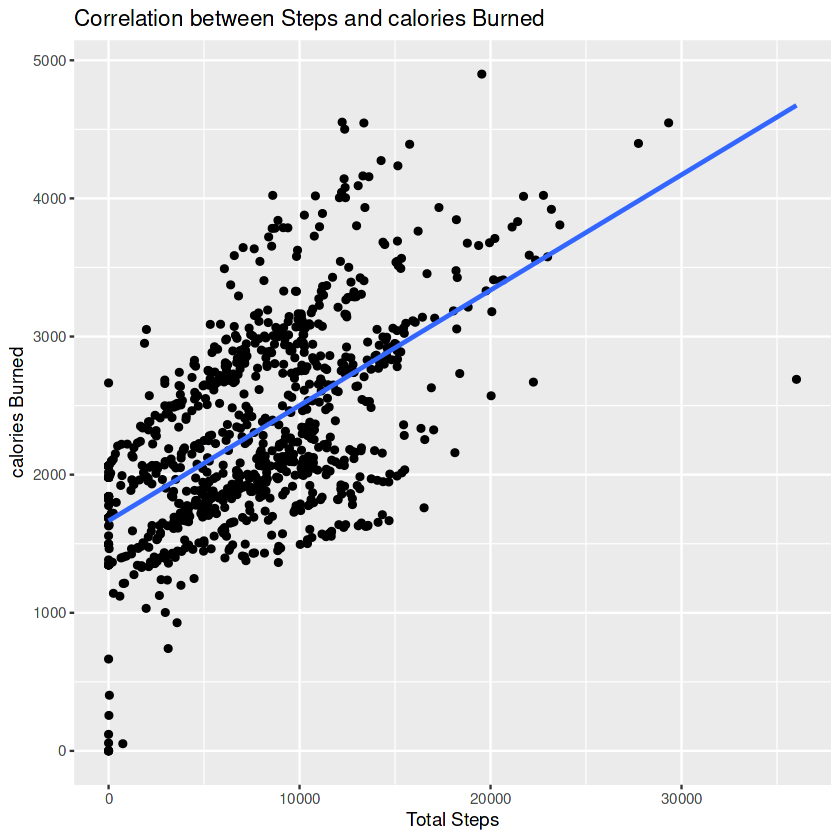

In [19]:
# Visualize correlations between variables
correlation_plot <- ggplot(daily_data, aes(x = total_steps, y = calories)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Correlation between Steps and calories Burned",
       x = "Total Steps",
       y = "calories Burned")

print(correlation_plot)

The code calculates the average number of steps taken by users each day of the week and then visualizes this information using a bar plot.

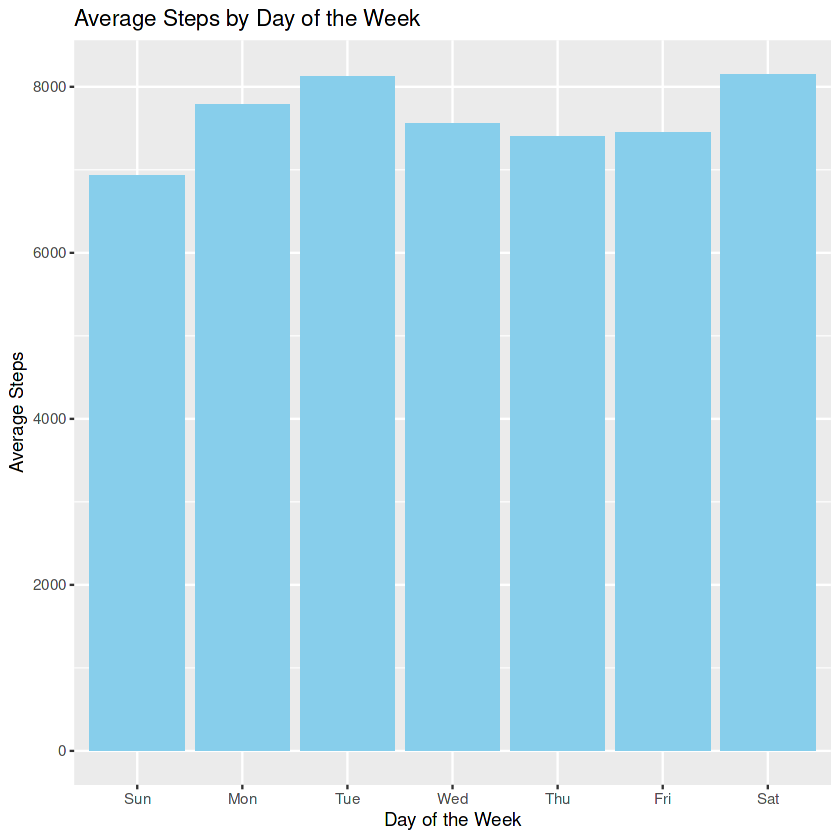

In [20]:
# Explore users' activity by day of the week
activity_by_day <- daily_data %>%
  mutate(weekday = wday(date, label = TRUE)) %>%
  group_by(weekday) %>%
  summarize(avg_steps = mean(total_steps, na.rm = TRUE))

# Visualize users' activity by day of the week
activity_by_day_plot <- ggplot(activity_by_day, aes(x = weekday, y = avg_steps)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Average Steps by Day of the Week",
       x = "Day of the Week",
       y = "Average Steps")

print(activity_by_day_plot)

The code segment analyzes sleep patterns by categorizing total sleep duration into three ranges: less than 7 hours, 7 to 9 hours, and more than 9 hours. It then calculates the count of occurrences for each sleep duration range and visualizes the distribution using a bar plot.

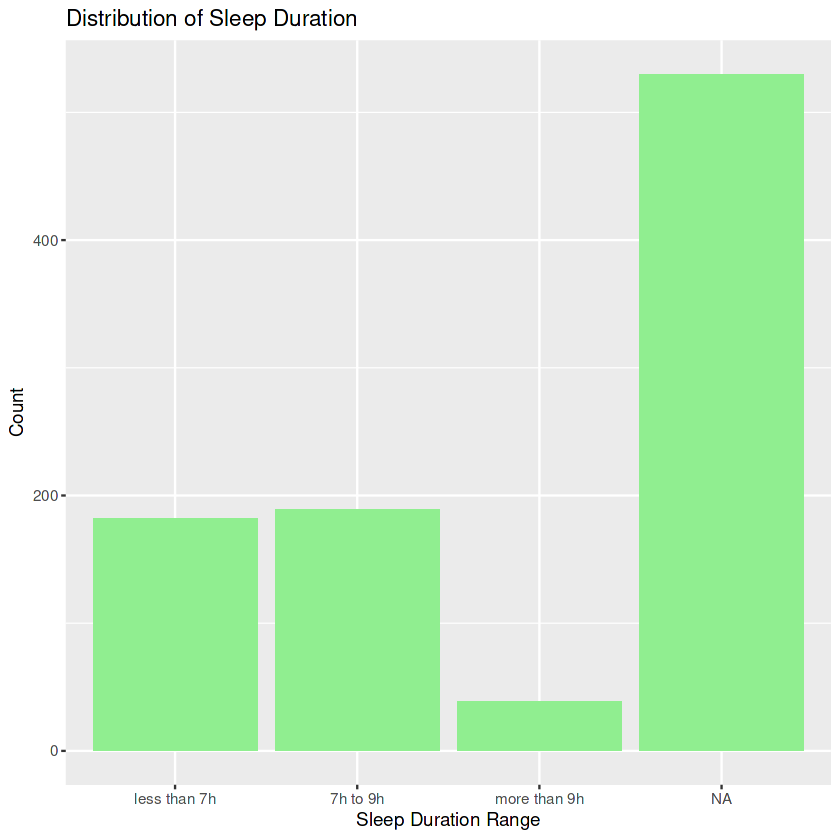

In [21]:
# Analyze sleep patterns
sleep_distribution <- daily_data %>%
  mutate(total_minutes_asleep_range = cut(total_minutes_asleep, breaks = c(0, 420, 540, Inf), labels = c("less than 7h", "7h to 9h", "more than 9h"))) %>%
  group_by(total_minutes_asleep_range) %>%
  summarize(count = n())

# Visualize sleep distribution
sleep_distribution_plot <- ggplot(sleep_distribution, aes(x = total_minutes_asleep_range, y = count)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  labs(title = "Distribution of Sleep Duration",
       x = "Sleep Duration Range",
       y = "Count")

print(sleep_distribution_plot)

The code segment explores the relationship between weight and activity by calculating the average weight and average distance covered for each user. It then visualizes this relationship using a scatter plot.

Warning message:
“Removed 31 rows containing missing values (`geom_point()`).”


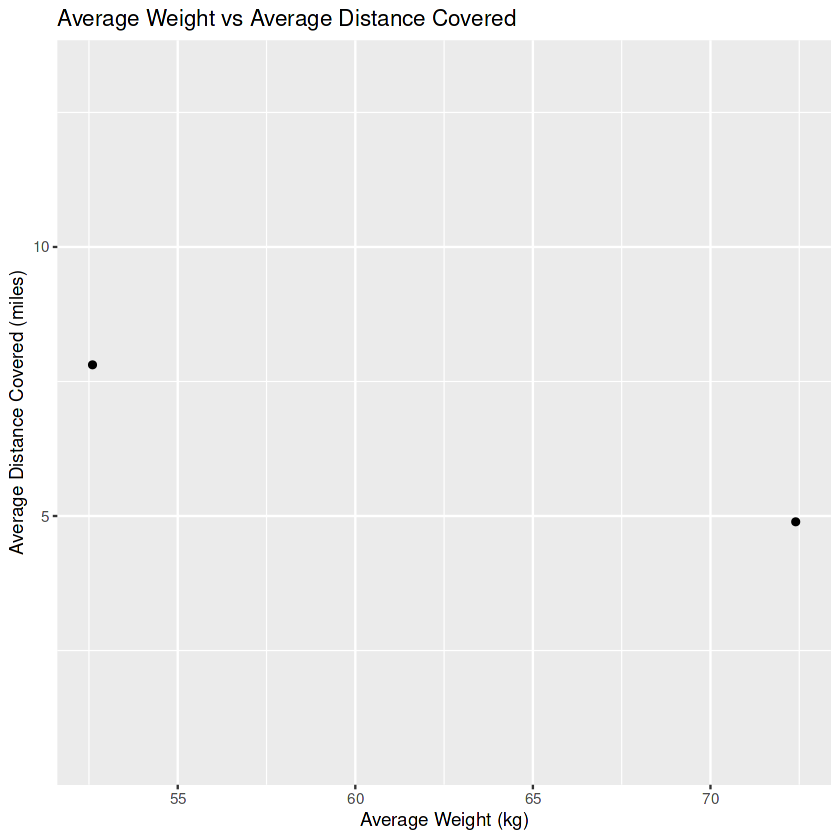

In [22]:
# Explore the relationship between weight and activity
weight_vs_activity <- daily_data %>%
  group_by(id) %>%
  summarize(avg_weight = mean(weight_kg, na.rm = TRUE),
            avg_distance = mean(total_distance, na.rm = TRUE))

# Visualize weight vs activity
weight_vs_activity_plot <- ggplot(weight_vs_activity, aes(x = avg_weight, y = avg_distance)) +
  geom_point() +
  labs(title = "Average Weight vs Average Distance Covered",
       x = "Average Weight (kg)",
       y = "Average Distance Covered (miles)")

print(weight_vs_activity_plot)

The code compares each user's average daily steps to a benchmark of 10,000 steps and calculates the percentage of users who exceed this benchmark.

In [23]:
# Comparison with Benchmarks (assuming 10000 steps as benchmark)
benchmark_comparison <- daily_data %>%
  group_by(id) %>%
  summarize(above_benchmark = ifelse(mean(total_steps) >= 10000, "Yes", "No")) %>%
  summarize(percentage_above_benchmark = mean(above_benchmark == "Yes", na.rm = TRUE) * 100)

print(paste0("Percentage of Users Above 10,000 Daily Steps Benchmark: ", benchmark_comparison$percentage_above_benchmark, "%"))

[1] "Percentage of Users Above 10,000 Daily Steps Benchmark: 21.2121212121212%"


The code segments users based on their activity level, sleep duration, and weight category, and visualizes the segmentation using stacked bar charts to explore relationships between these variables.

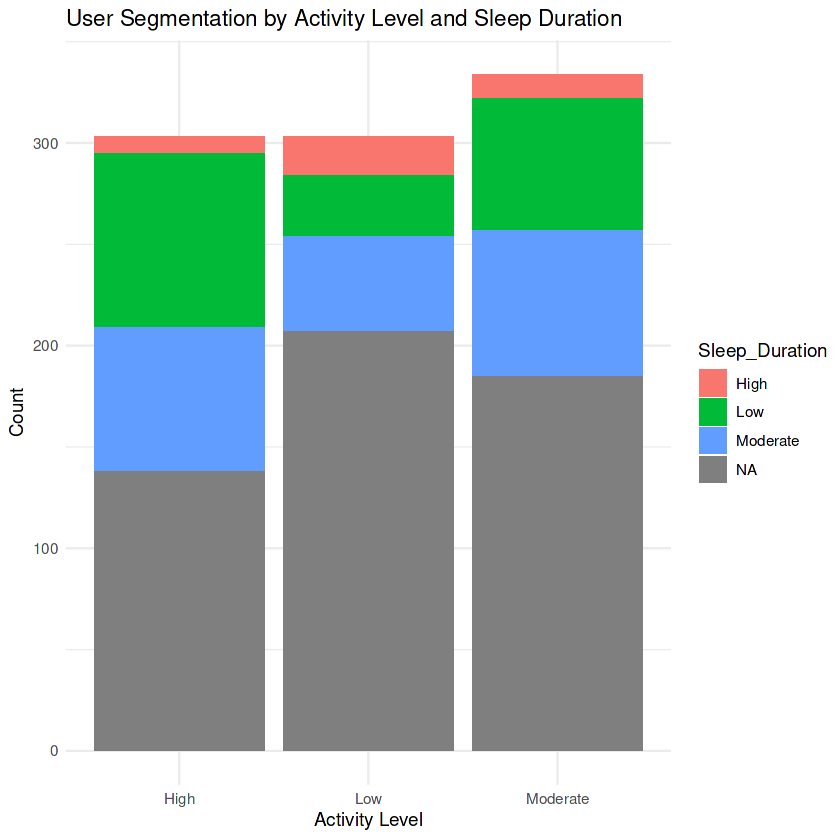

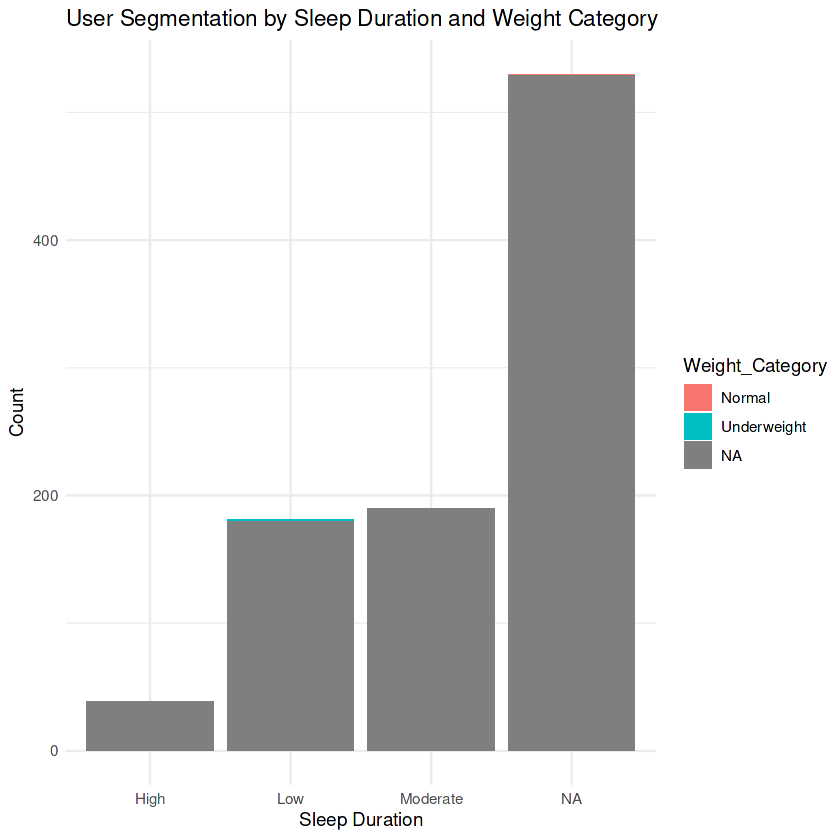

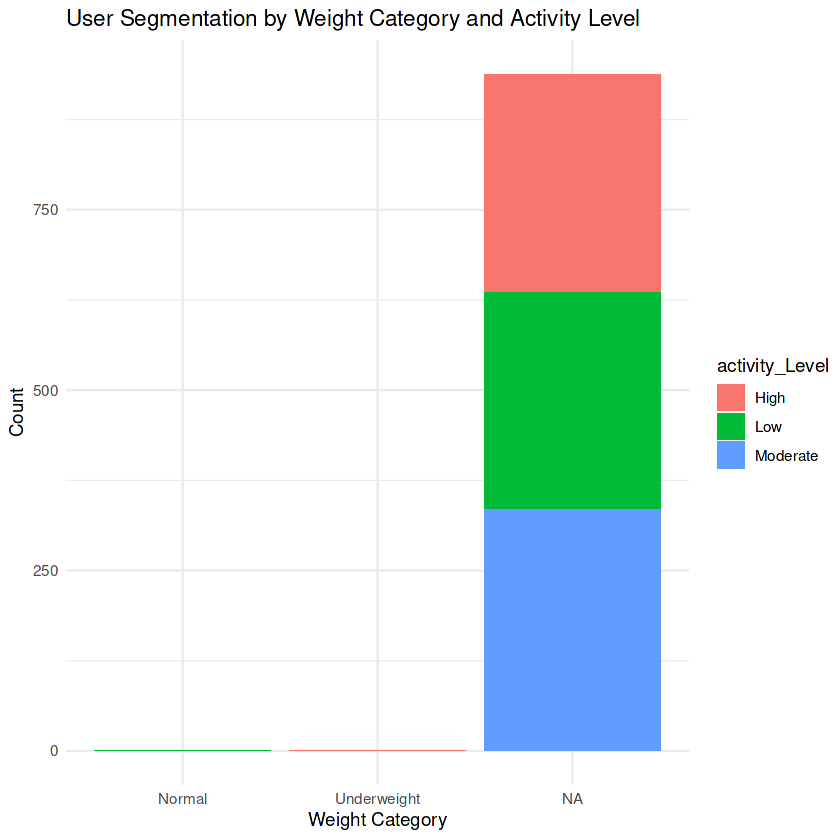

In [24]:
# User Segmentation

# Create user segmentation data frame
user_segmentation <- daily_data %>%
  mutate(activity_Level = case_when(
    total_steps < 5000 ~ "Low",
    total_steps >= 5000 & total_steps < 10000 ~ "Moderate",
    total_steps >= 10000 ~ "High"
  ),
  Sleep_Duration = case_when(
    total_minutes_asleep < 420 ~ "Low",
    total_minutes_asleep >= 420 & total_minutes_asleep < 540 ~ "Moderate",
    total_minutes_asleep >= 540 ~ "High"
  ),
  Weight_Category = case_when(
    weight_kg < 60 ~ "Underweight",
    weight_kg >= 60 & weight_kg < 80 ~ "Normal",
    weight_kg >= 80 ~ "Overweight"
  ))

# Plot stacked bar charts
plot_activity_level <- ggplot(user_segmentation, aes(x = activity_Level, fill = Sleep_Duration)) +
  geom_bar(position = "stack") +
  labs(title = "User Segmentation by Activity Level and Sleep Duration",
       x = "Activity Level",
       y = "Count") +
  theme_minimal()

plot_sleep_duration <- ggplot(user_segmentation, aes(x = Sleep_Duration, fill = Weight_Category)) +
  geom_bar(position = "stack") +
  labs(title = "User Segmentation by Sleep Duration and Weight Category",
       x = "Sleep Duration",
       y = "Count") +
  theme_minimal()

plot_weight_category <- ggplot(user_segmentation, aes(x = Weight_Category, fill = activity_Level)) +
  geom_bar(position = "stack") +
  labs(title = "User Segmentation by Weight Category and Activity Level",
       x = "Weight Category",
       y = "Count") +
  theme_minimal()

# Print the plots
print(plot_activity_level)
print(plot_sleep_duration)
print(plot_weight_category)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


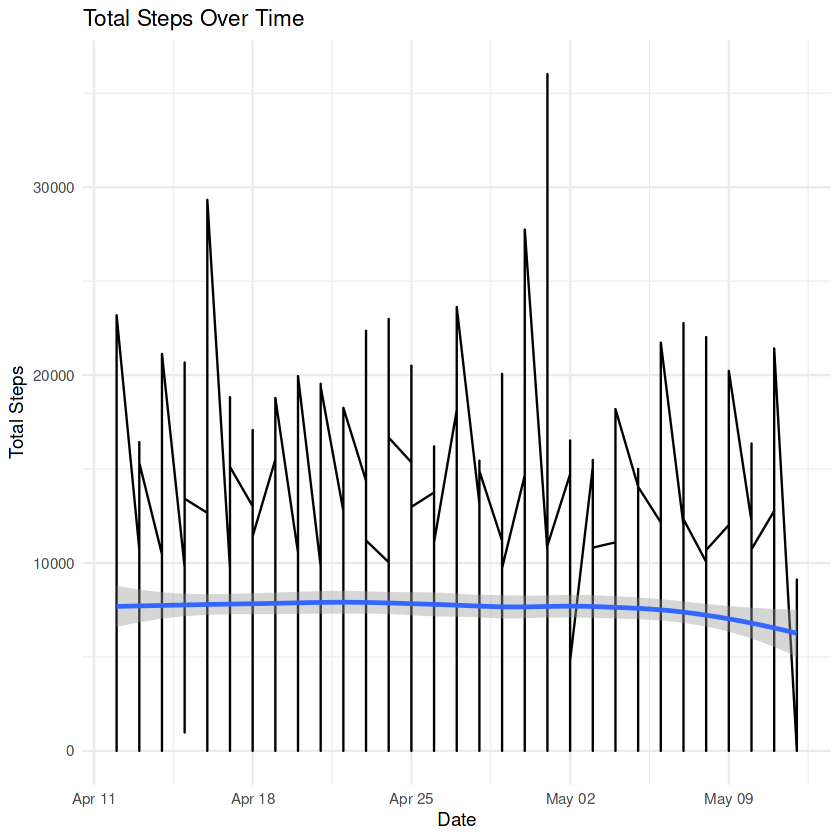

In [25]:
# Longitudinal Analysis


# Create line plots for longitudinal analysis
plot_steps <- ggplot(daily_data, aes(x = date, y = total_steps)) +
  geom_line() +
  labs(title = "Total Steps Over Time",
       x = "Date",
       y = "Total Steps") +
  theme_minimal() +
  geom_smooth()

print(plot_steps)

2. **Hourly Activity Analysis:**
   - Plot hourly steps, calories burned, and activity intensities over time to visualize patterns and fluctuations throughout the day.
   - Use bar charts to compare the average steps, calories, and intensities across different hours or time intervals.

The code visualizes the hourly steps over time using a bar chart, displaying the step totals for each hour.

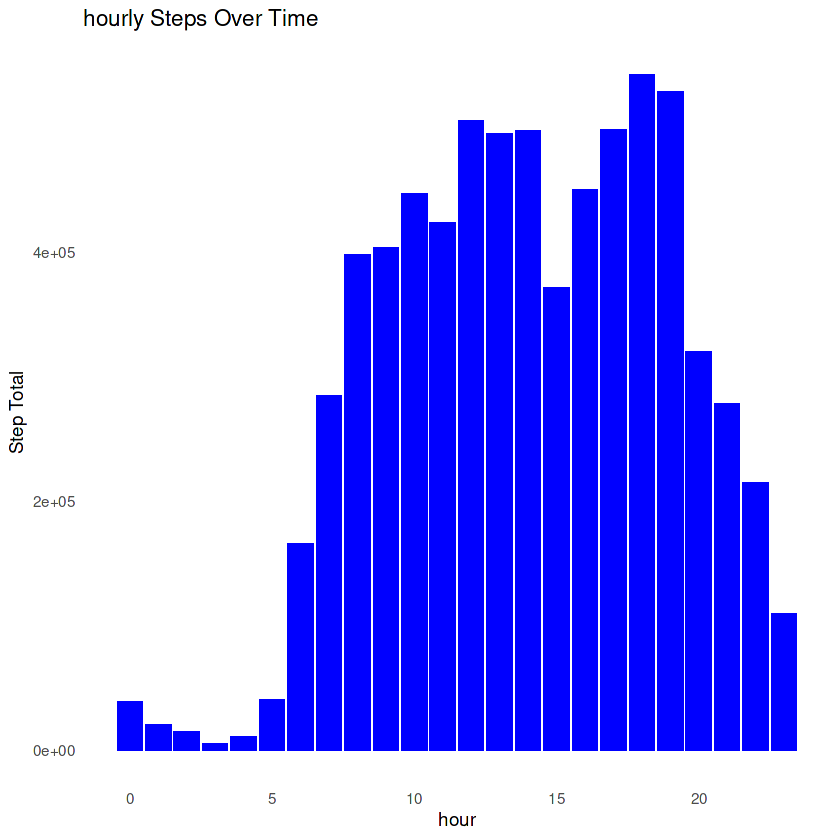

In [26]:
# Plot hourly steps over time
plot_steps <- ggplot(hourly_steps, aes(x = hour, y = step_total)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "hourly Steps Over Time",
       x = "hour",
       y = "Step Total") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

print(plot_steps)

The code visualizes the hourly calories over time using a bar chart, displaying the calories totals for each hour.

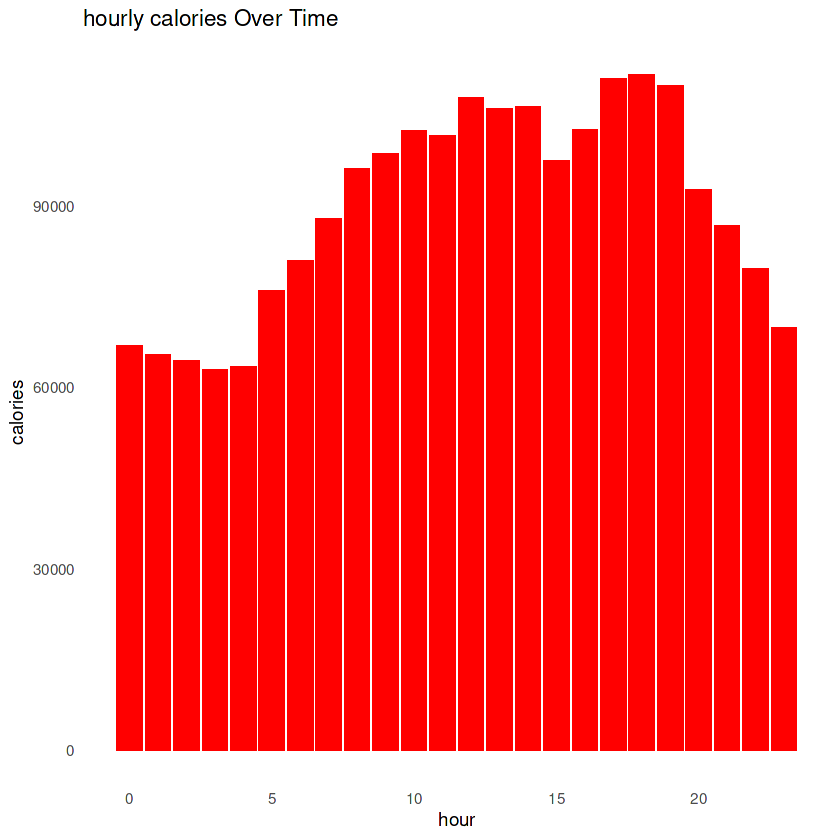

In [27]:
# Plot hourly calories over time
plot_calories <- ggplot(hourly_calories, aes(x = hour, y = calories)) +
  geom_bar(stat = "identity", fill = "red") +
  labs(title = "hourly calories Over Time",
       x = "hour",
       y = "calories") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

print(plot_calories)

The code visualizes the hourly intensities over time using a bar chart, displaying the intensities totals for each hour.

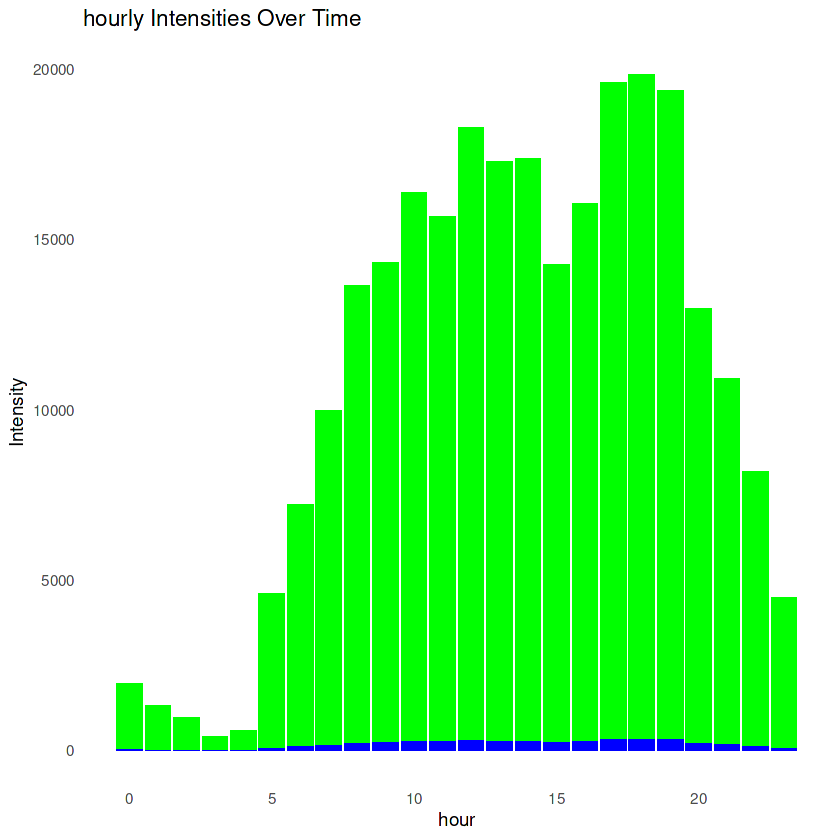

In [28]:
# Plot hourly intensities over time
plot_intensities <- ggplot(hourly_intensities, aes(x = hour, y = total_intensity)) +
  geom_bar(stat = "identity", fill = "green") +
  geom_bar(aes(y = average_intensity), stat = "identity", fill = "blue") +
  labs(title = "hourly Intensities Over Time",
       x = "hour",
       y = "Intensity") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

print(plot_intensities)

3. **Daily Activity Classification:**
   - Classify users based on their daily step counts into categories such as sedentary, lightly active, fairly active, and very active.
   - Visualize the distribution of users across these categories using bar charts

In [29]:
# Calculate daily total steps per user
daily_steps <- daily_data %>%
  group_by(id, date) %>%
  summarise(daily_total_steps = sum(total_steps))

# Classify users based on daily step count
daily_steps <- daily_steps %>%
  mutate(activity_level = case_when(
    daily_total_steps < 5000 ~ "Sedentary",
    daily_total_steps >= 5000 & daily_total_steps < 7500 ~ "Lightly active",
    daily_total_steps >= 7500 & daily_total_steps < 10000 ~ "Fairly active",
    daily_total_steps >= 10000 ~ "Very active"
  ))

# Print a summary of user activity levels
activity_summary <- daily_steps %>%
  group_by(activity_level) %>%
  summarise(Count = n())

print(activity_summary)

`summarise()` has grouped output by 'id'. You can override using the `.groups`
argument.


# A tibble: 4 × 2
  activity_level Count
  <chr>          <int>
1 Fairly active    163
2 Lightly active   171
3 Sedentary        303
4 Very active      303


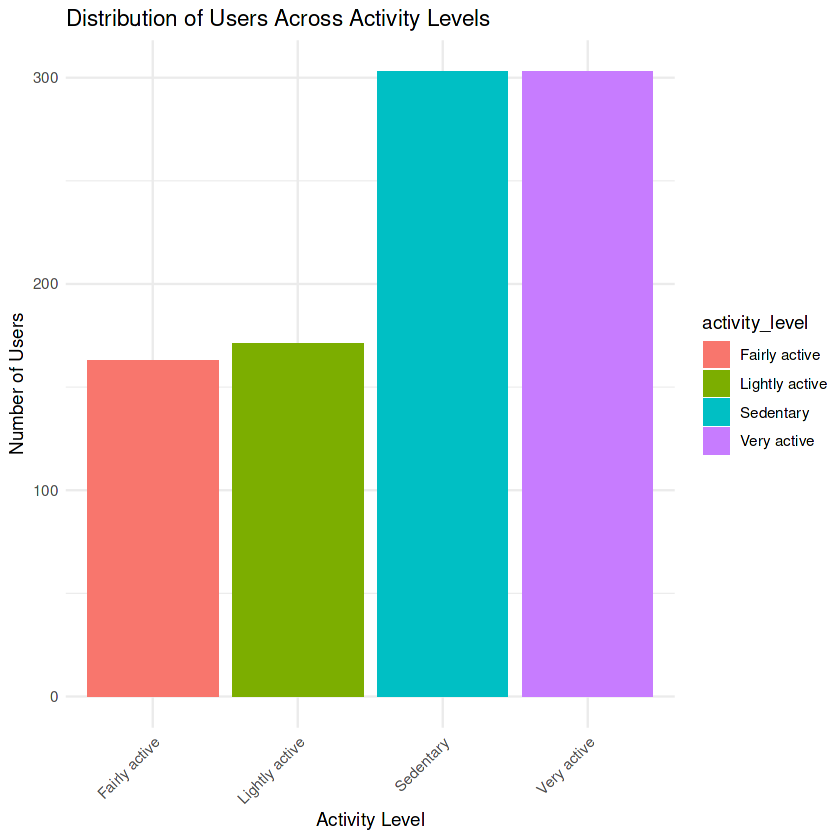

In [30]:
library(ggplot2)

# Plot the distribution of users across activity levels
activity_plot <- ggplot(activity_summary, aes(x = activity_level, y = Count, fill = activity_level)) +
  geom_bar(stat = "identity") +
  labs(title = "Distribution of Users Across Activity Levels",
       x = "Activity Level",
       y = "Number of Users") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

print(activity_plot)

4. **Device Usage Analysis:**
   - Calculate the number of days each user wore their Fitbit device and classify users into categories based on usage frequency (e.g., high use, moderate use, low use).
   - Plot the distribution of users across these categories using bar charts or histograms.

In [31]:
# 1. Calculate the number of days each user has used their smart device
user_device_usage <- daily_data %>%
  group_by(id) %>%
  summarise(days_used = n_distinct(date))

# 2. Classify users into categories
user_device_usage$category <- cut(user_device_usage$days_used, breaks = c(0, 10, 20, 31),
                                  labels = c("Low Use", "Moderate Use", "High Use"))

# 3. Count the number of users in each category
category_counts <- table(user_device_usage$category)

# Print the counts
print(category_counts)


     Low Use Moderate Use     High Use 
           1            3           29 


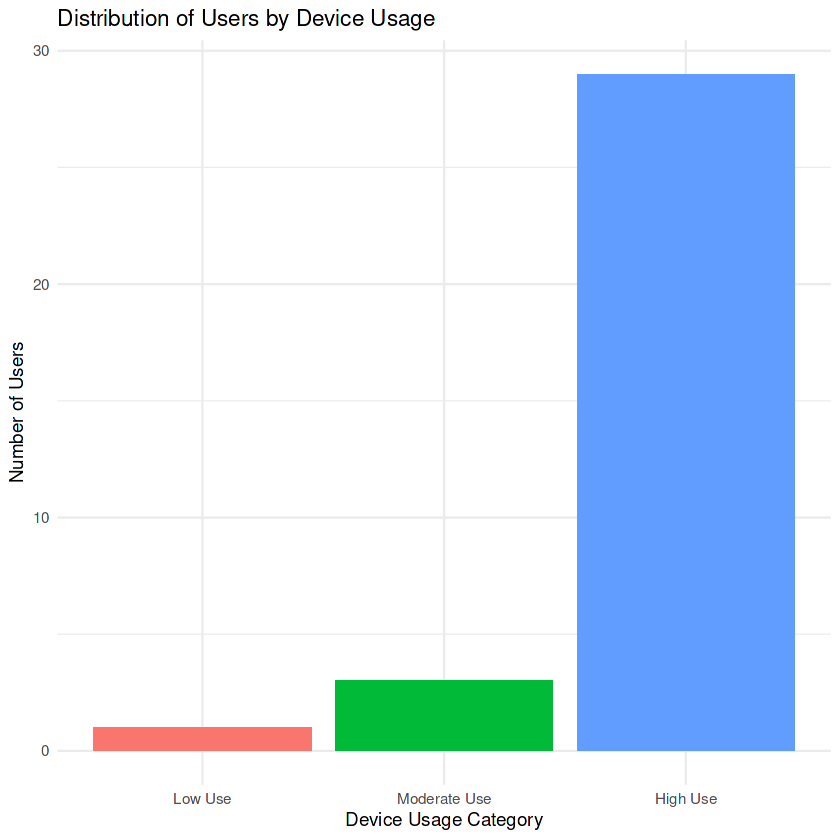

In [32]:
# Convert the category counts to a data frame
category_counts_df <- as.data.frame(category_counts)
names(category_counts_df) <- c("Category", "Count")

# Plotting the bar plot
bar_plot <- ggplot(category_counts_df, aes(x = Category, y = Count, fill = Category)) +
  geom_bar(stat = "identity") +
  labs(title = "Distribution of Users by Device Usage",
       x = "Device Usage Category",
       y = "Number of Users") +
  theme_minimal() +
  theme(legend.position = "none")  # Remove the legend

print(bar_plot)

The provided code creates a histogram of wear durations ('wear_duration' is a column representing wear durations in minutes in the dataset 'daily_data'). It plots the distribution of wear durations with bins of width 60 minutes, fills the bars with sky blue color, and outlines them in black. The plot follows a minimal theme.

In [33]:
colnames(daily_data)

[1] "id"                         "date"                      
 [3] "total_steps"                "total_distance"            
 [5] "very_active_distance"       "moderately_active_distance"
 [7] "light_active_distance"      "sedentary_active_distance" 
 [9] "very_active_minutes"        "fairly_active_minutes"     
[11] "lightly_active_minutes"     "sedentary_minutes"         
[13] "calories"                   "total_minutes_asleep"      
[15] "total_time_in_bed"          "weight_kg"                 
[17] "log_id"

This code calculates the total wear minutes by summing the total rest and activity minutes and then creates a new column in the `daily_data` dataframe to store these values.

In [34]:
# Create a new column for total minutes of activity
daily_data$total_activity_minutes <- daily_data$very_active_minutes + daily_data$fairly_active_minutes + daily_data$lightly_active_minutes

# Create a new column for total minutes of rest
daily_data$total_rest_minutes <- daily_data$sedentary_minutes + daily_data$total_minutes_asleep

daily_data$total_wear_minutes <- daily_data$total_rest_minutes + daily_data$total_activity_minutes


This code creates a time series plot of total activity and rest minutes over time, with smooth lines added using LOESS smoothing and different colors for activity and rest categories.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 530 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”


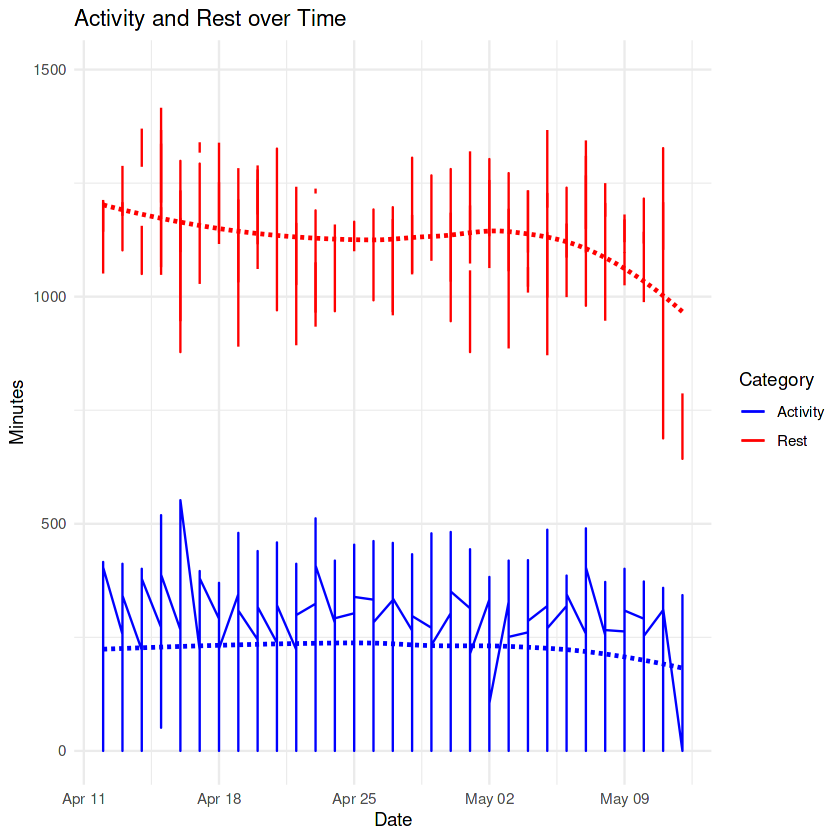

In [35]:
# Time series plot for activity and rest with smooth lines
ggplot(daily_data, aes(x = date)) +
  geom_line(aes(y = total_activity_minutes, color = "Activity")) +
  geom_line(aes(y = total_rest_minutes, color = "Rest")) +
  geom_smooth(aes(y = total_activity_minutes), method = "loess", se = FALSE, color = "blue", linetype = "dashed") +
  geom_smooth(aes(y = total_rest_minutes), method = "loess", se = FALSE, color = "red", linetype = "dashed") +
  labs(x = "Date", y = "Minutes", color = "Category", title = "Activity and Rest over Time") +
  scale_color_manual(values = c("blue", "red")) +
  theme_minimal()

This code generates a histogram plot of the wear durations based on the total wear minutes column in the `daily_data` dataframe, with bins of width 60 minutes, and labels the axes and title accordingly, while using a minimal theme for styling.

Warning message:
“Removed 530 rows containing non-finite values (`stat_bin()`).”


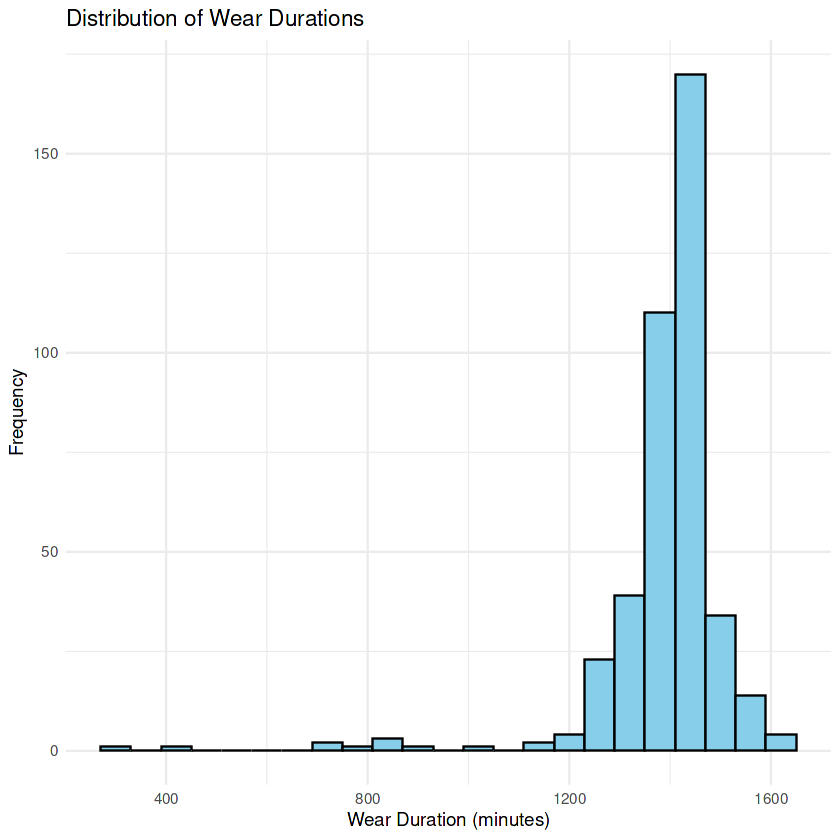

In [36]:
# Plot histogram of wear durations
ggplot(data = daily_data, aes(x = total_wear_minutes)) +
  geom_histogram(binwidth = 60, fill = "skyblue", color = "black") +  # Adjust binwidth as needed
  labs(title = "Distribution of Wear Durations",
       x = "Wear Duration (minutes)",
       y = "Frequency") +
  theme_minimal()

The provided code calculates two new variables, `total_active_minutes` and `total_active_distance`, by summing up corresponding active minutes and active distances from the 'daily_data' dataset. Then, it creates two separate histograms:

1. Histogram of total active minutes:
2. Histogram of total active distance:

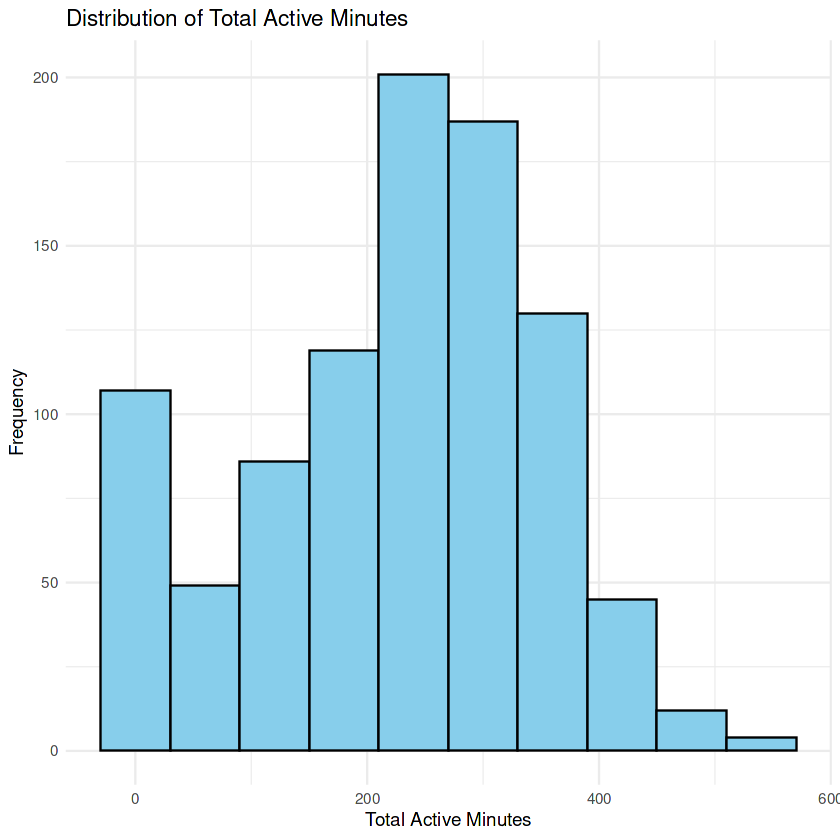

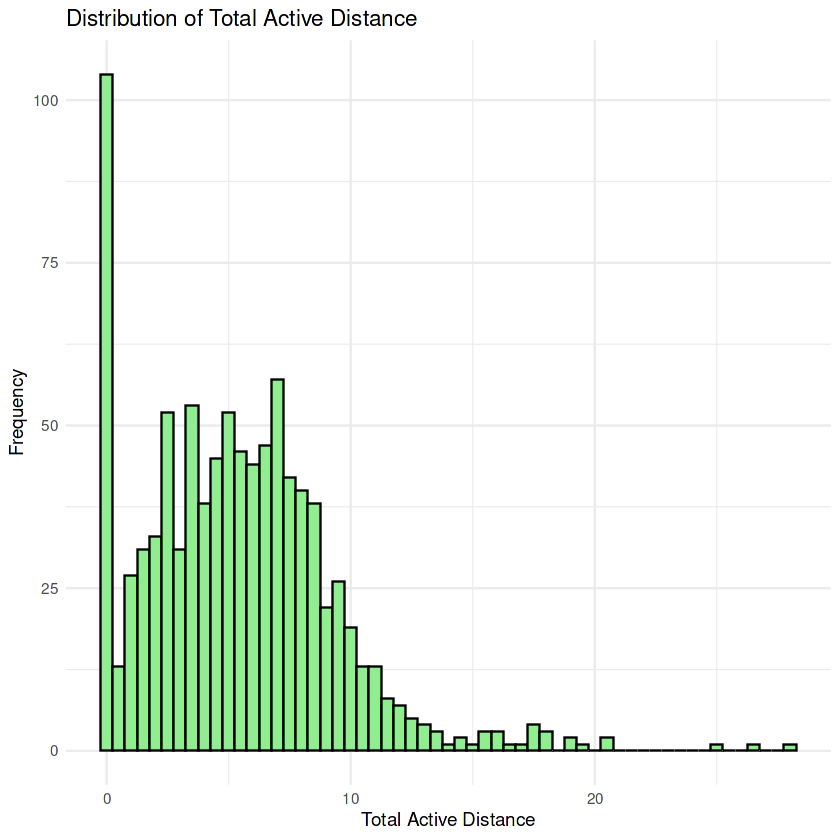

In [37]:
total_active <- daily_data %>%
  mutate(total_active_minutes = very_active_minutes + fairly_active_minutes + lightly_active_minutes,
         total_active_distance = very_active_distance + moderately_active_distance + light_active_distance)

# Histogram of total active minutes
ggplot(data = total_active, aes(x = total_active_minutes)) +
  geom_histogram(binwidth = 60, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Total Active Minutes",
       x = "Total Active Minutes",
       y = "Frequency") +
  theme_minimal()

# Histogram of total active distance
ggplot(data = total_active, aes(x = total_active_distance)) +
  geom_histogram(binwidth = 0.5, fill = "lightgreen", color = "black") +
  labs(title = "Distribution of Total Active Distance",
       x = "Total Active Distance",
       y = "Frequency") +
  theme_minimal()

The provided code calculates the total sum of different activity metrics (`very_active_minutes`, `fairly_active_minutes`, `lightly_active_minutes`, and `sedentary_minutes`) from the `daily_data` dataset. Then, it reshapes the data for plotting using `pivot_longer` function and creates a bar chart

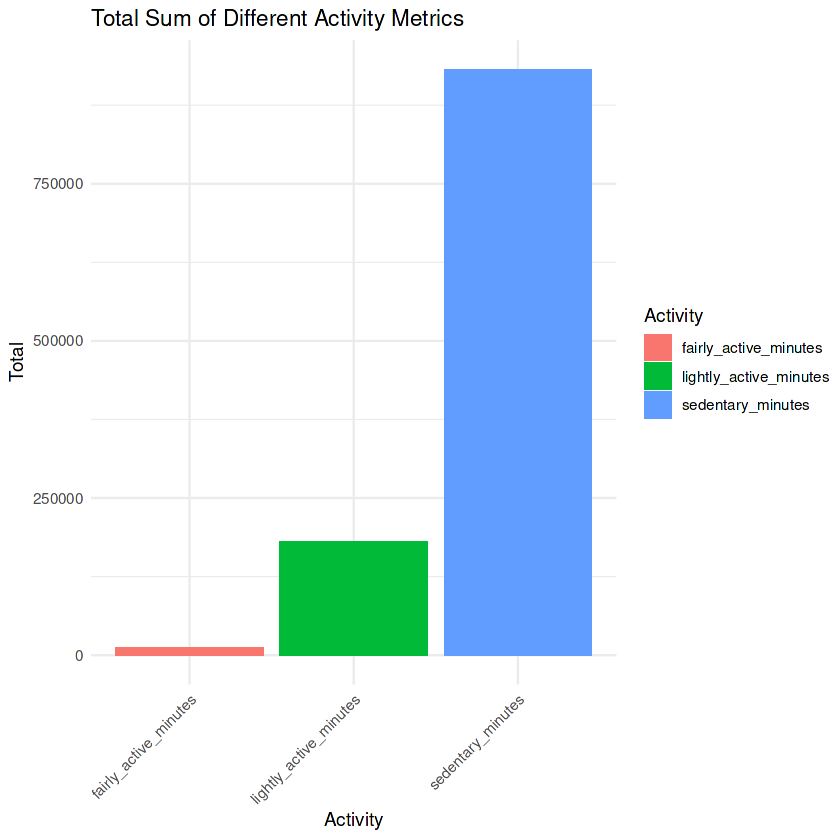

In [38]:
sums <- daily_data %>%
  summarise(very_active_minutes = sum(very_active_minutes),
            fairly_active_minutes = sum(fairly_active_minutes),
            lightly_active_minutes = sum(lightly_active_minutes),
            sedentary_minutes = sum(sedentary_minutes))

# Reshape the data for plotting
sums <- tidyr::pivot_longer(sums, cols = -1, names_to = "Activity", values_to = "Total")

# Plot the bar chart
ggplot(data = sums, aes(x = Activity, y = Total, fill = Activity)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Sum of Different Activity Metrics",
       x = "Activity",
       y = "Total",
       fill = "Activity") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Share Phase

By effectively sharing the results of the Fitbit data analysis through presentations, dashboards, reports, and engaging discussions, the share stage aims to disseminate actionable insights and empower stakeholders to make informed decisions about health, fitness, and well-being.

# Act Phase

By taking action based on the insights derived from the Fitbit data analysis, the act stage aims to drive positive behavior change, improve health outcomes, and empower individuals to lead healthier, more active lives. Through targeted interventions, feedback mechanisms, and collaboration with stakeholders, organizations can make meaningful contributions to promoting health and wellness in their communities.

Here are proposed reccommendations

1. **Set Personalized Activity Goals:** Tailor daily activity targets to individual fitness levels to boost physical activity adherence and enhance overall health.

2. **Improve Sleep Quality:** Advocate for consistent sleep schedules and optimal sleep environments to optimize sleep duration and quality, supporting better health outcomes.

3. **Encourage Varied Physical Activity:** Promote diverse physical activities, including walking, cycling, and strength training, to foster a balanced and active lifestyle that improves metabolic health.

4. **Offer Tailored Weight Management Guidance:** Provide personalized strategies, such as mindful eating and regular exercise, based on individual activity levels and sleep patterns to support healthy weight management.

5. **Utilize Data for Goal Tracking:** Harness fitness trackers and health apps to monitor progress, enabling users to adjust goals regularly and stay motivated on their wellness journey.

6. **Targeted Interventions:** Direct interventions towards specific user segments identified through data analysis to maximize impact and engagement.

7. **Implement Feedback Loops:** Establish feedback mechanisms to provide real-time support and encouragement, fostering sustained behavior change.

8. **Continuous Evaluation:** Continuously assess intervention effectiveness and refine strategies based on ongoing feedback and data insights.

9. **Forge Collaborations:** Explore partnerships with healthcare providers and wellness organizations to broaden the reach and impact of interventions aimed at promoting health and well-being.

Follow me on Twitter 🐦, connect with me on LinkedIn 🔗, and check out my GitHub 🐙. You won't be disappointed!

👉 Twitter: https://twitter.com/NdiranguMuturi1  
👉 LinkedIn: https://www.linkedin.com/in/isaac-muturi-3b6b2b237  
👉 GitHub: https://github.com/Isaac-Ndirangu-Muturi-749   

So, what are you waiting for? Join me on my tech journey and learn something new today! 🚀🌟